In [1]:
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

[53.76190476190476, 53.8448275862069, 49.868852459016395, 41.283018867924525, 54.285714285714285, 53.333333333333336, nan]


c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret =

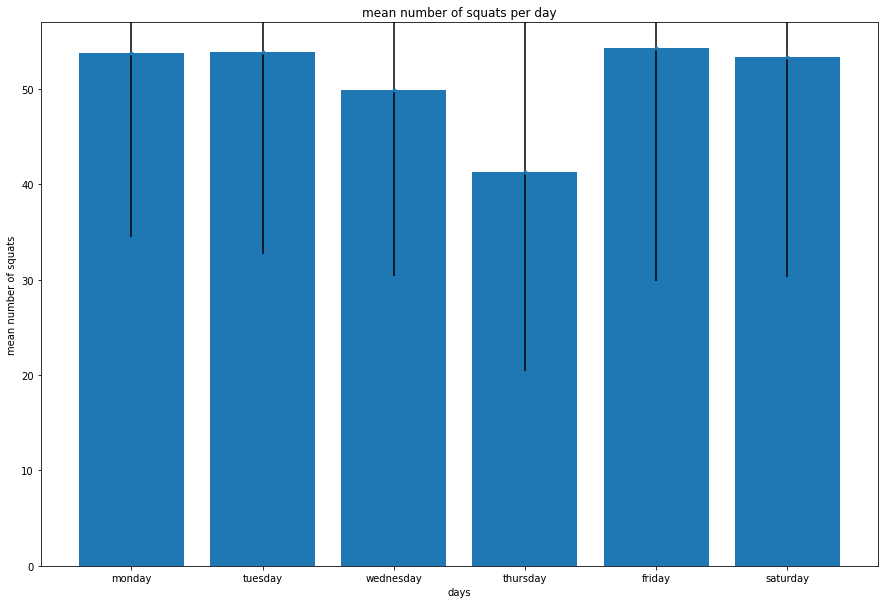

In [12]:
#store amount of squats per day

averagePerDay = [0, 0, 0, 0, 0, 0, 0] #index = day of the week
entriesPerDay = [0, 0, 0, 0, 0, 0, 0] #index = day of the week
monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []

#use pandas to open the file
df = pd.read_csv('cu.csv')

#loop through file
for i in range(len(df)):
    #for every file take the date and amount of squats
    data = df.iloc[i]
    #get day number
    day = parser.parse(data[0]).weekday()
    #print(day)
    #get data
    amount = int(data[1])

    #add amount of squats to list of corresponding day
    match day:
        case 1:
            monday.append(amount)
        case 2:
            tuesday.append(amount)
        case 3:
            wednesday.append(amount)
        case 4:
            thursday.append(amount)
        case 5:
            friday.append(amount)
        case 6:
            saturday.append(amount)
        case 7:
            sunday.append(amount)


#create dataset mean squats per day
data = {
    'monday' : np.mean(monday),
    'tuesday' : np.mean(tuesday),
    'wednesday' : np.mean(wednesday),
    'thursday' : np.mean(thursday),
    'friday' : np.mean(friday),
    'saturday' : np.mean(saturday),
    'sunday' : np.mean(sunday)
}

#create list with standard deviation per day
stdev = [np.std(monday), np.std(tuesday), np.std(wednesday), np.std(thursday), np.std(friday), np.std(saturday), np.std(sunday)]
print(list(data.values()))
days = list(data.keys())
mean = list(data.values())

#initialise plot
f = mp.figure(figsize = (15, 5))
#add data to the plot
mp.bar(days, mean)
#add errorbars
mp.errorbar(days, mean, yerr=stdev, fmt='.', ecolor='black')
mp.xlabel('days')
mp.ylabel('mean number of squats')
mp.title('mean number of squats per day')

#show the plot
mp.show()


[3575, 3387, 3123, 3042, 2188, 380, 480]
[62, 63, 58, 61, 53, 7, 9]
[57.66129032258065, 53.76190476190476, 53.8448275862069, 49.868852459016395, 41.283018867924525, 54.285714285714285, 53.333333333333336]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


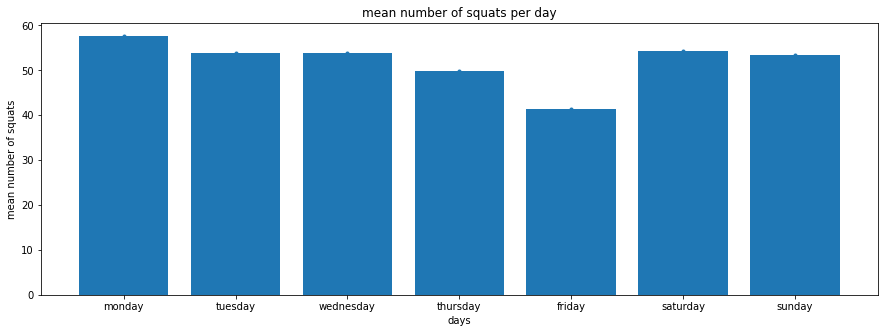

In [11]:
#store amount of squats per day

totalPerDay = [0, 0, 0, 0, 0, 0, 0] #index = day of the week
entriesPerDay = [0, 0, 0, 0, 0, 0, 0] #index = day of the week

#use pandas to open the file
df = pd.read_csv('cu.csv')

#loop through file
for i in range(len(df)):
    #for every file take the date and amount of squats
    data = df.iloc[i]
    
    #get day number
    day = parser.parse(data[0]).weekday()

    #get data
    amount = int(data[1])

    totalPerDay[day] += amount
    entriesPerDay[day] += 1


print(totalPerDay)
print(entriesPerDay)

averagePerDay = []

for i in range(len(totalPerDay)):
    averagePerDay.append(totalPerDay[i] / entriesPerDay[i])

print(averagePerDay)
#create dataset mean squats per day
data = {
    'monday' : averagePerDay[0],
    'tuesday' : averagePerDay[1],
    'wednesday' : averagePerDay[2],
    'thursday' : averagePerDay[3],
    'friday' : averagePerDay[4],
    'saturday' : averagePerDay[5],
    'sunday' : averagePerDay[6]
}

#create list with standard deviation per day
stdev = [np.std(totalPerDay[0]), np.std(totalPerDay[1]), np.std(totalPerDay[2]), np.std(totalPerDay[3]), np.std(totalPerDay[4]), np.std(totalPerDay[5]), np.std(totalPerDay[6])]
print(stdev)

days = list(data.keys())
mean = list(data.values())

#initialise plot
f = mp.figure(figsize = (15, 5))
#add data to the plot
mp.bar(days, mean)
#add errorbars
mp.errorbar(days, mean, yerr=stdev, fmt='.', ecolor='black')
mp.xlabel('days')
mp.ylabel('mean number of squats')
mp.title('mean number of squats per day')

#show the plot
mp.show()